In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# importing libraries (numpy, matplotlib, PIL)

## Part 1
### Plot the R, G, B values along the scanline on the 250th row of the image.

Text(0.5, 0.98, '250 row Scanline RGB Values')

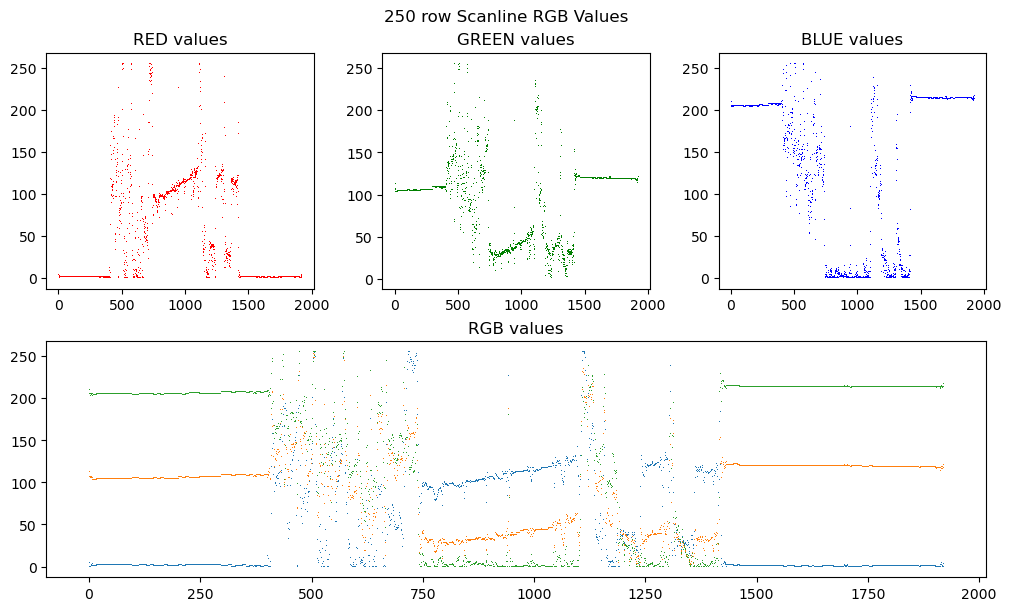

In [2]:
img = np.array(Image.open('iribefront.png')) # taking input of the original img
row250 = img[250,:,:] # Reading the 250th row

fig = plt.figure(figsize=(10,6), constrained_layout=True) # Resizing output fig for better visualization
spec = fig.add_gridspec(2, 3)

ax01 = fig.add_subplot(spec[0, 0])
plt.title("RED values")
plt.plot(row250[:, 0],',',color = 'r') # Plotting R values

ax02 = fig.add_subplot(spec[0, 1])
plt.title("GREEN values")
plt.plot(row250[:, 1],',',color = 'g') # Plotting G values

ax03 = fig.add_subplot(spec[0, 2])
plt.title("BLUE values")
plt.plot(row250[:, 2],',',color = 'b') # Plotting B values

ax11 = fig.add_subplot(spec[1, :])
plt.title("RGB values")
plt.plot(row250,',') # Plotting RGB values

fig.suptitle('250 row Scanline RGB Values')

## Part 2
### Stack the R, G, B channels of the image vertically.

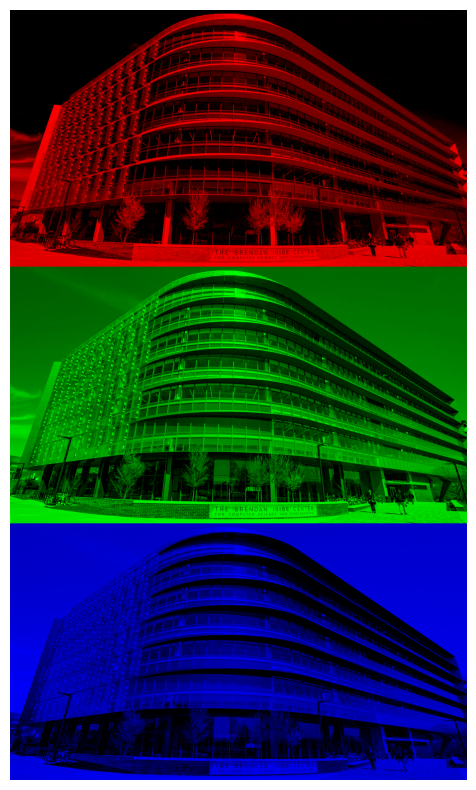

In [3]:
img = np.array(Image.open('iribefront.png')) # taking input of the original img
img_R, img_G, img_B = img.copy(), img.copy(), img.copy() # Making 3 copies of the image
img_R[:, :, (1, 2)] = 0 # making GB values 0
img_G[:, :, (0, 2)] = 0 # making RB values 0
img_B[:, :, (0, 1)] = 0 # making RG values 0
img_rgb = np.concatenate((img_R,img_G,img_B), axis=0) # concatenating imgs vertically
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(img_rgb)

## Part 3
### Load the input color image and swap its red and green color channels.

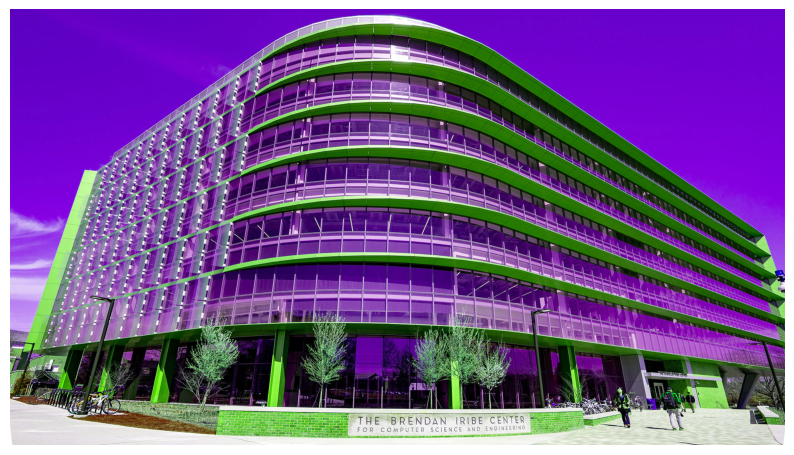

In [4]:
img = np.array(Image.open('iribefront.png')) # taking input of the original img
img_copy = img.copy() # Making img copy
img_copy[:, :, 0] = img[:, :, 1] # swapping R with G values
img_copy[:, :, 1] = img[:, :, 0] # swapping G with R values
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(img_copy)

## Part 4
### Convert the input color image to a grayscale image.

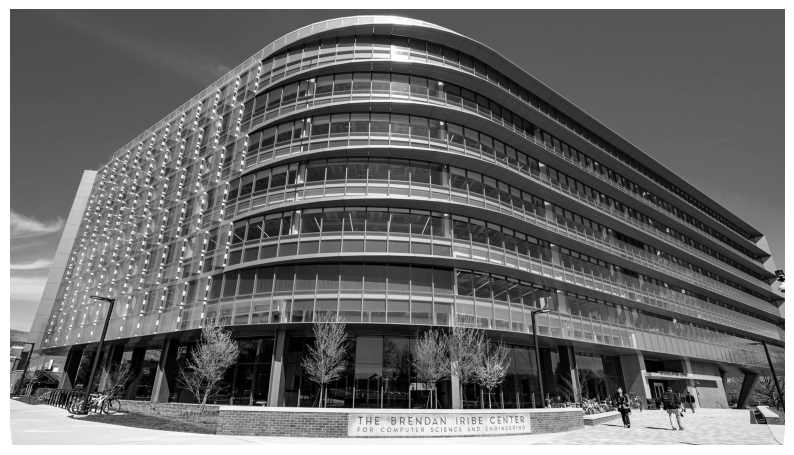

In [5]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2] # Separating the channels
gray_img = 0.2989 * R + 0.5870 * G + 0.1140 * B # Conversion formula for rgb to grayscale
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(gray_img, cmap = 'gray')

## Part 5
### Take the R, G, B channels of the image. Compute an average over the three channels. Note that you may need to do the necessary typecasting (uint8 and double) to avoid overflow.

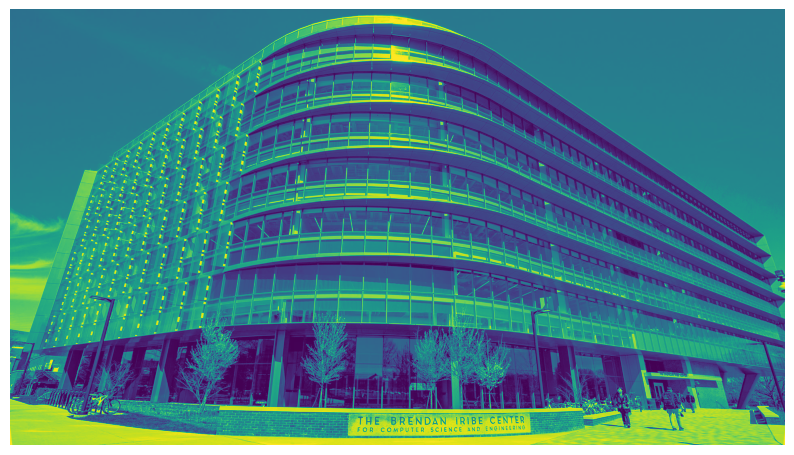

In [6]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img
avg_img = np.array(rgb_img.sum(2)/(255*3)) # Averaging the channels
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(avg_img)

## Part 6
### Take the grayscale image in (4), obtain the negative image (i.e., mapping 255 to 0 and 0 to 255).

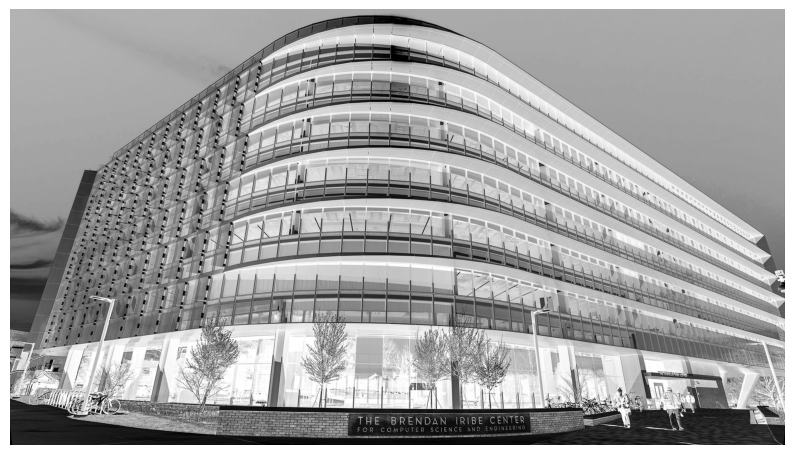

In [7]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img
neg_img = 255*3 - gray_img # Formula for onverting grayscale img to negative from (4)
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(neg_img, 'gray')

## Part 7
### First, crop the original image into a squared image of size 372 x 372. Then, rotate the image by 90, 180, and 270 degrees and stack the four images (0, 90, 180, 270 degreess) horizontally.

(375, 375, 3)


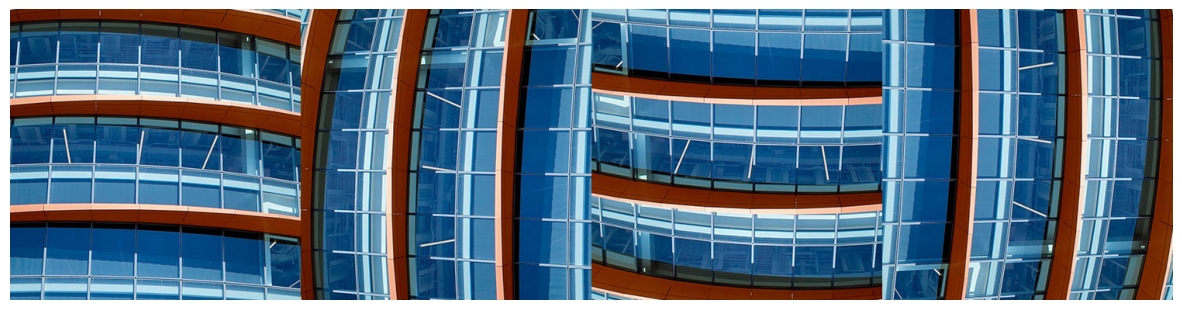

In [8]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img

img_shape = rgb_img.shape # Getting the shape of the img
width = img_shape[1]
length = img_shape[0]

# Crop window xy start and end coorinates
start_col = int((width/2) - (375/2))
end_col = int((width/2) + (375/2))
start_row = int((length/2) - (375/2))
end_row = int((length/2) + (375/2))

crop_img = rgb_img[start_row:end_row, start_col:end_col] # Cropped img
print(crop_img.shape)

deg_0 = crop_img # 0 deg rotaion
deg_90 = np.rot90(crop_img) # 90 deg rotation
deg_180 = np.rot90(crop_img, 2) # 180 deg rotation
deg_270 = np.rot90(crop_img, 3) # 270 deg rotation
rotated_imgs = np.concatenate((deg_0,deg_90,deg_180,deg_270), axis=1) # Concatenating imgs horizontally

plt.figure(figsize=(15, 5)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(rotated_imgs)

## Part 8
### Create another image with the same size as the image. First, initialize this image as zero everywhere. Then, for each channel, set the pixel values as 255 when the corresponding pixel values in the image are greater than 127.

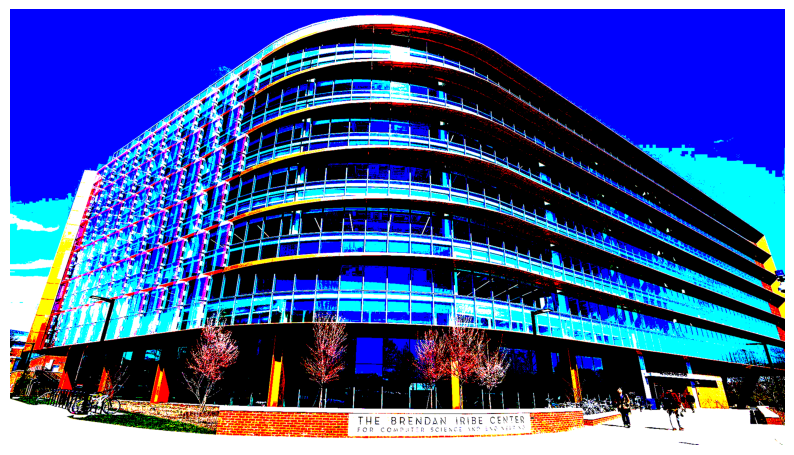

In [9]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img

img_shape = rgb_img.shape # Getting the shape of the img
length = img_shape[0]
width = img_shape[1]
depth = img_shape[2]

mask = np.zeros((length, width, depth)) # Creating img with 0 same dimension of original

for i in range(length):
    for j in range(width):
        if(rgb_img[i, j, 0] > 127): # Checking R channel if greater than 127
            mask[i, j, 0] = 255
        if(rgb_img[i, j, 1] > 127): 
            mask[i, j, 1] = 255
        if(rgb_img[i, j, 2] > 127): 
            mask[i, j, 2] = 255

plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(mask.astype(int))

## Part 9
### Report the mean R, G, B values for those pixels marked by the mask in (8).

[[[106 106 106]
  [ 96  96  96]
  [ 91  91  91]
  ...
  [106 106 106]
  [106 106 106]
  [122 122 122]]

 [[106 106 106]
  [ 96  96  96]
  [ 91  91  91]
  ...
  [106 106 106]
  [106 106 106]
  [122 122 122]]

 [[104 104 104]
  [ 96  96  96]
  [ 91  91  91]
  ...
  [106 106 106]
  [106 106 106]
  [122 122 122]]

 ...

 [[255 255 255]
  [251 251 253]
  [255 255 255]
  ...
  [255 255 253]
  [253 253 251]
  [248 248 246]]

 [[255 255 255]
  [251 251 253]
  [255 255 255]
  ...
  [251 251 249]
  [255 255 253]
  [254 254 252]]

 [[255 255 255]
  [251 251 253]
  [255 255 255]
  ...
  [254 254 252]
  [255 255 253]
  [249 249 247]]]


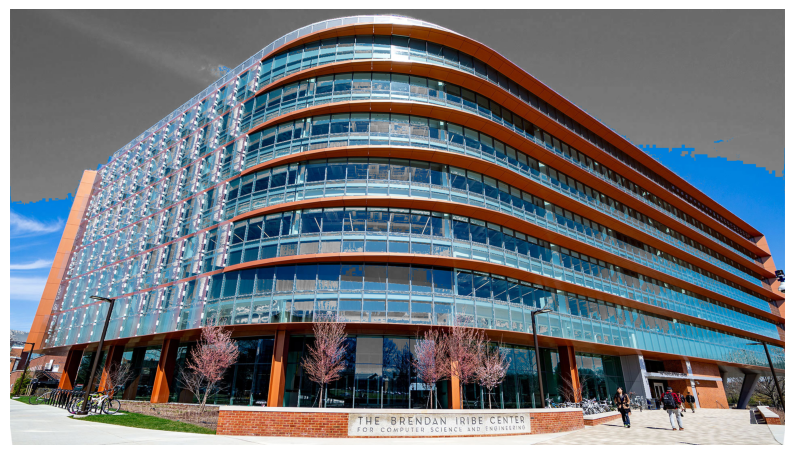

In [10]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img
mask_marking = rgb_img.copy() # Creating copy of the original img

img_shape = rgb_img.shape # getting the shape of the img
length = img_shape[0]
width = img_shape[1]

for i in range(length):
    for j in range(width):
        if (mask[i, j, 0] == 255 or mask[i, j, 1] == 255 or mask[i, j, 2]) == 255: 
            avg = mask_marking[i,j,0]+mask_marking[i,j,1]+mask_marking[i,j,2]/(255*3)
            mask_marking[i,j] = avg # averaging values marked by the mask

print(mask_marking) # Printing the values
plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(mask_marking) # Img plot (not asked)

## Part 10
### Take the grayscale image in (3). Create and initialize another image as all zeros. For each 5 x 5 window in the grayscale image, find out the maximum value and set the pixels with the maximum value in the 5x5 window as 255 in the new image.

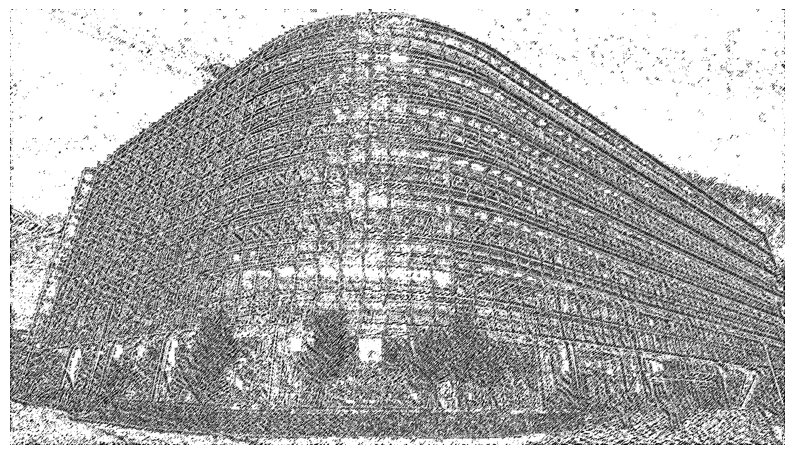

In [11]:
rgb_img = np.array(Image.open('iribefront.png')) # taking input of the original img
im = Image.open('iribefront.png') 
w, h = im.size # Getting the size of the img

nonmax = np.zeros((h, w)) # 2D Array of zeroes dimensions of the original img
kernel_size = 5
kernel_wstart = 0
kernel_hstart = 0
kernel_woffset = 0
kernel_hoffset = 0

for i in range(h):
    kernel_hstart = i
    kernel_hoffset = kernel_hstart + kernel_size # Kernel height
    
    if kernel_hoffset > h: # Checking for kernel overflow height
        break
        
    for j in range(w):
        kernel_wstart = j
        kernel_woffset = kernel_wstart + kernel_size # Kernel width
        
        if kernel_woffset > w: # Checking for kernel overflow width
            break
        else:
            img_sec = gray_img[kernel_hstart:kernel_hoffset,kernel_wstart:kernel_woffset] # Grayscale img from 4 kernel overlay 
            max_value = np.max(img_sec)
            result = np.where(img_sec == max_value) # Find the max Value
            listOfCordinates = list(zip(result[0], result[1])) # Finding coordinates of the max values 
            for cord in listOfCordinates:
                nonmax[kernel_hstart+cord[1],kernel_wstart+cord[0]] = 255 # Assigning 255 for the max values

plt.figure(figsize=(10, 10)) # Resizing output fig for better visualization
plt.axis('off')
plt.imshow(nonmax, cmap = 'gray')